In [65]:
from pixell import enmap, enplot
import numpy as np
import matplotlib.pyplot as plt
from ja import Timer
from astropy import units as u
from astropy import constants as c

In [2]:
# Convenient wrapper for displaying enmaps
def eshow(x,**kwargs): enplot.show(enplot.plot(x,**kwargs)) 

In [3]:
def psf_path(JD):
    return '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/'+str(JD)+'_sliced/'
psf_file = 'zen.010601_011009.calibrated.HH.dirty.psf.fits'

In [5]:
psf8098 = enmap.read_map(psf_path(2458098)+psf_file,)[0,0,:,:].squeeze()
psf8099 = enmap.read_map(psf_path(2458099)+psf_file,)[0,0,:,:].squeeze()

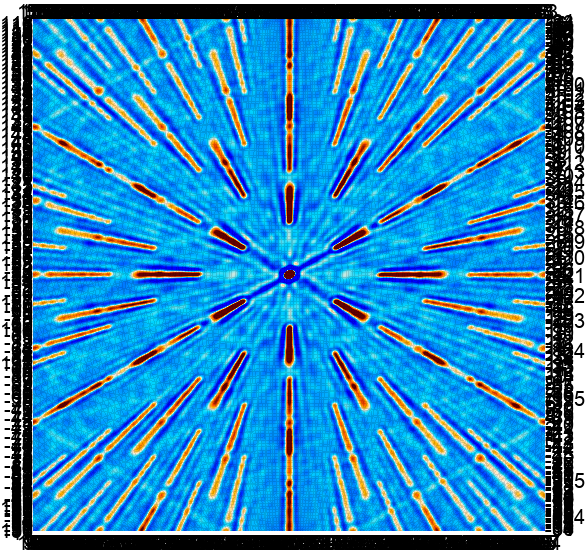

In [6]:
eshow(psf8098)

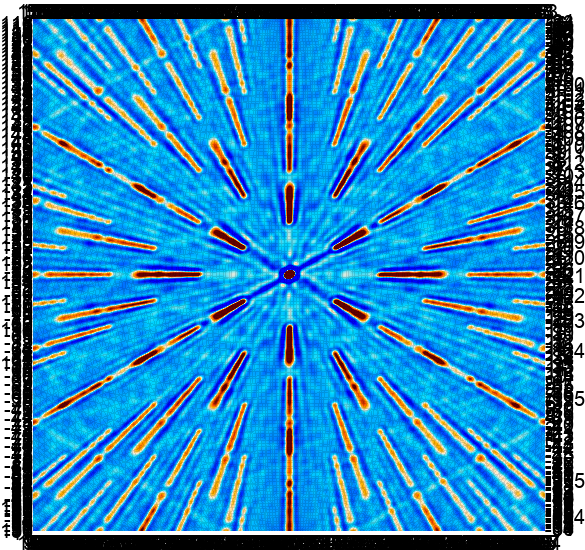

In [7]:
eshow(psf8099)

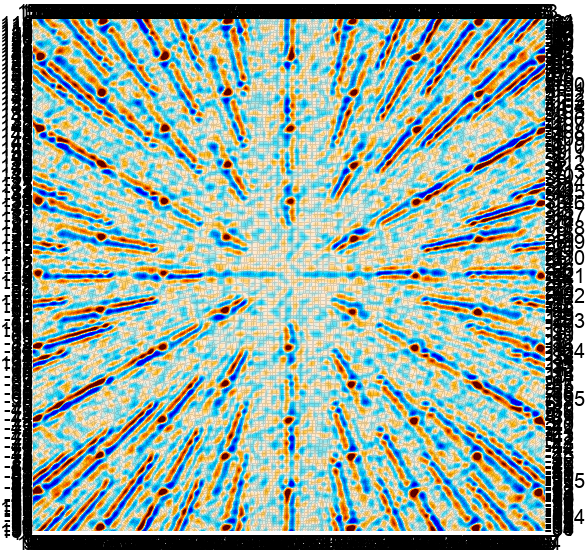

In [8]:
eshow(psf8098-psf8099)

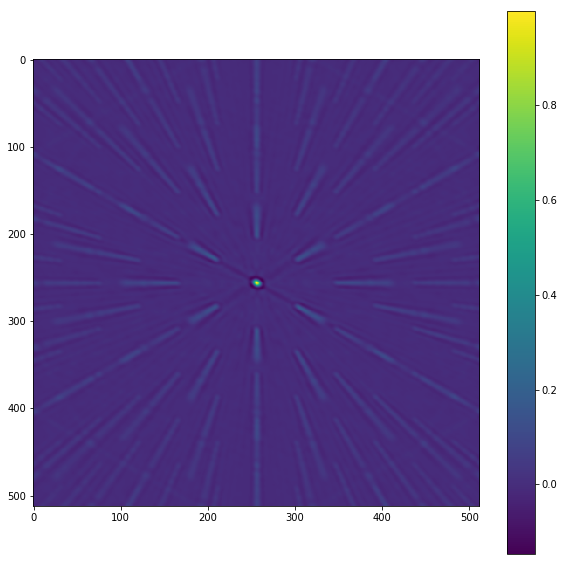

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(psf8098, aspect='equal')
plt.colorbar()
plt.show()

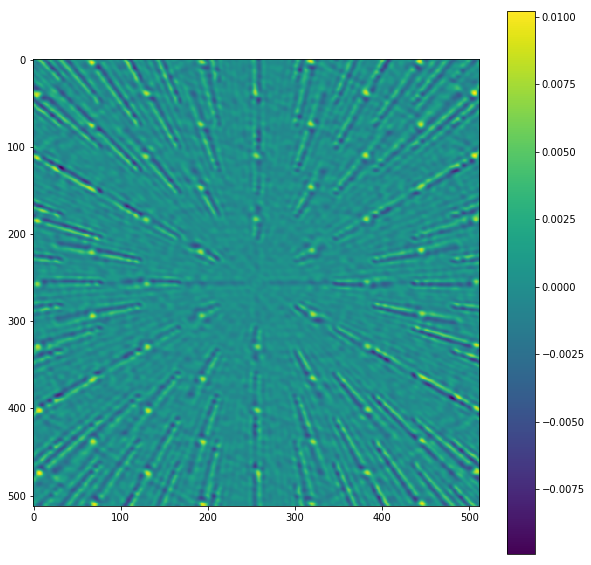

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(psf8098 - psf8099, aspect='equal')
plt.colorbar()
plt.show()

In [12]:
apsf = enmap.apod(psf8098, 50)

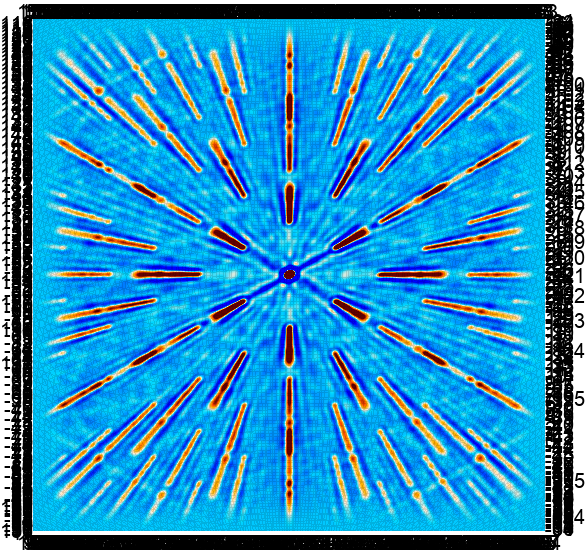

In [13]:
eshow(apsf)

In [14]:
uvcoverage = np.fft.fftshift(np.abs(enmap.fft(apsf)))

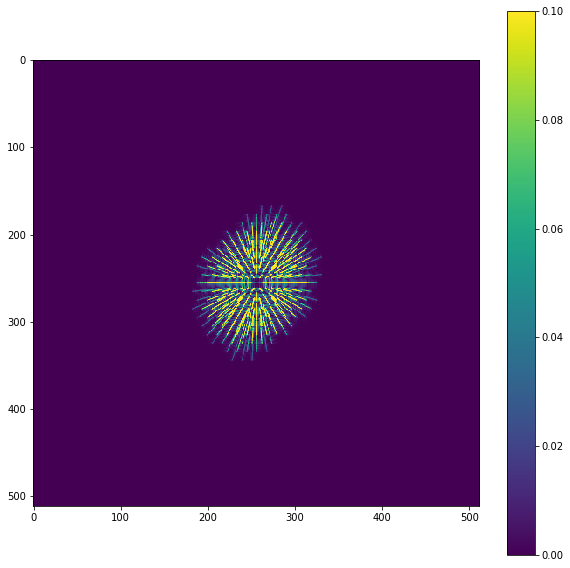

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(uvcoverage,aspect='equal',interpolation='None',vmax=0.1)
plt.colorbar()
plt.show()

In [16]:
psf_path(2458098)

'/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/2458098_sliced/'

In [17]:
from pyuvdata import UVData

In [56]:
timer = Timer()
timer.start()
uv8098 = UVData()
uv8098.read(psf_path(2458098)+'zen.010601_011009.calibrated.HH.uvfits')
timer.stop('Reading')

Reading 101.97712802886963 sec


In [57]:
timer = Timer()
timer.start()
uv8099 = UVData()
uv8099.read(psf_path(2458099)+'zen.010601_011009.calibrated.HH.uvfits')
timer.stop('Reading')

Reading 147.828430891037 sec


In [58]:
def bl_length(uvd):
    """ Heavy forbid you want the baseline length """
    return np.sqrt(np.power(uvd.uvw_array, 2).sum(axis=1))

In [59]:
blm8098 = bl_length(uv8098)

In [71]:
print(uv8098.lst_array.shape, uv8099.lst_array.shape)

(31694,) (31694,)


In [77]:
print(uv8098.lst_array[0], uv8099.lst_array[0])
print((uv8098.lst_array[0] - uv8099.lst_array[0])*24*3600.)

0.28879768053932087 0.2887613730492455
3.1369671425130363


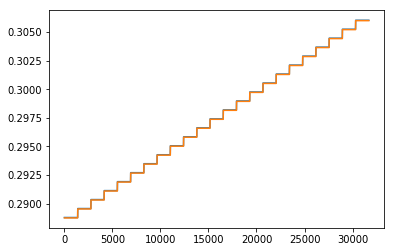

In [74]:
plt.plot(uv8098.lst_array)
plt.plot(uv8099.lst_array)

(3.135, 3.14)

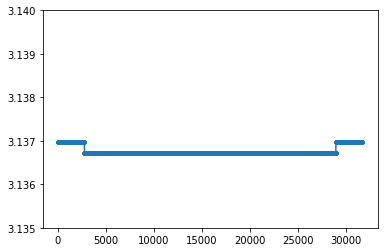

In [86]:
# Time offset.  May not be able to get around this one ... what the heck?
plt.plot(((uv8098.lst_array-uv8099.lst_array)*u.day).to(u.s),'.-')
plt.ylim([3.135,3.140])

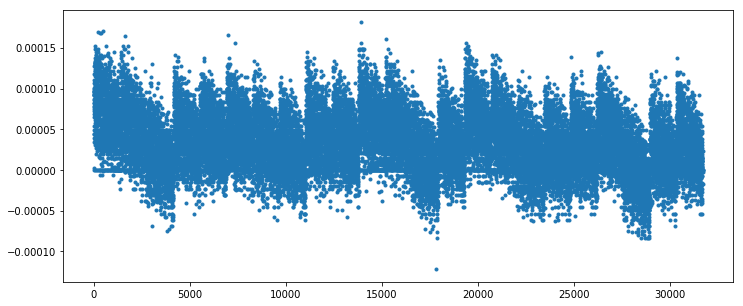

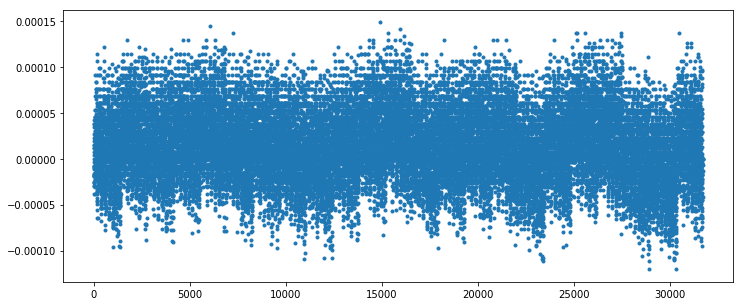

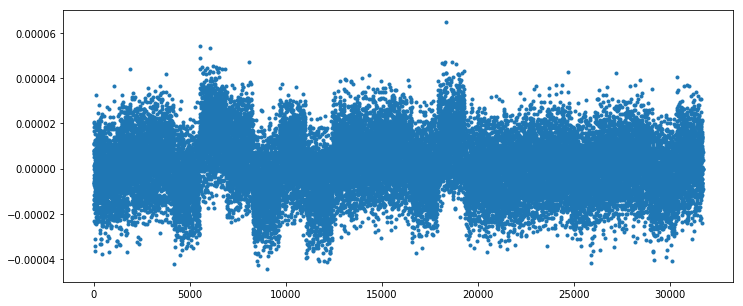

In [92]:
plt.figure(figsize=[12,5])
plt.plot(uv8098.uvw_array[:,0]-uv8099.uvw_array[:,0],'.')
plt.show()
plt.figure(figsize=[12,5])
plt.plot(uv8098.uvw_array[:,1]-uv8099.uvw_array[:,1],'.')
plt.show()
plt.figure(figsize=[12,5])
plt.plot(uv8098.uvw_array[:,2]-uv8099.uvw_array[:,2],'.')
plt.show()

In [127]:
harmonized_flags = np.logical_or(uv8098.flag_array, uv8099.flag_array)

In [128]:
uv8098.flag_array.sum()

98961224

In [129]:
uv8099.flag_array.sum()

88145384

In [130]:
uv8099.flag_array.shape

(31694, 1, 1024, 4)

In [131]:
xx8098 = uv8098.data_array[:,0,:,0].squeeze()
xx8099 = uv8099.data_array[:,0,:,0].squeeze()
flags_xx = ~harmonized_flags[:,0,:,0].squeeze()
print(xx8098.shape, xx8099.shape, flags_xx.shape)

(31694, 1024) (31694, 1024) (31694, 1024)


divide by zero encountered in true_divide
invalid value encountered in true_divide


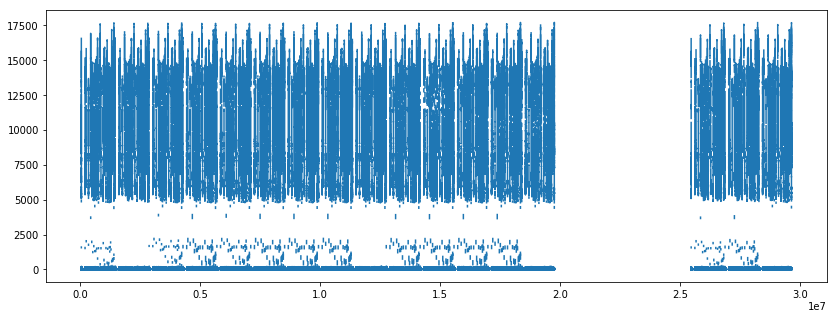

In [134]:
plt.figure(figsize=[14,5])
plt.plot(np.abs( (xx8098/flags_xx).flatten()) ) 
# Sigh.  Why, oh why, are they setting the flagged data to zero?

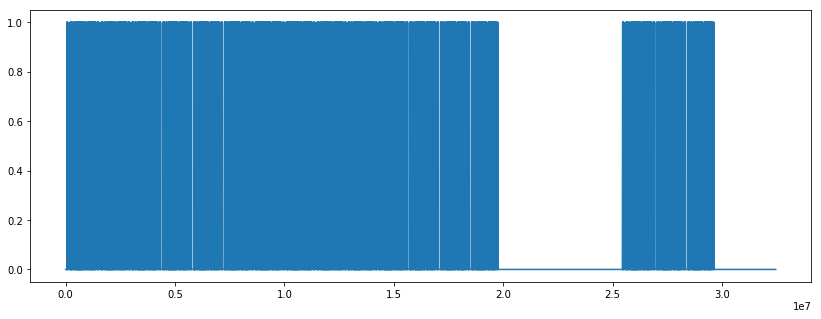

In [124]:
plt.figure(figsize=[14,5])
plt.plot( ~uv8098.flag_array[:,0,:,0].flatten() )

divide by zero encountered in true_divide
invalid value encountered in true_divide


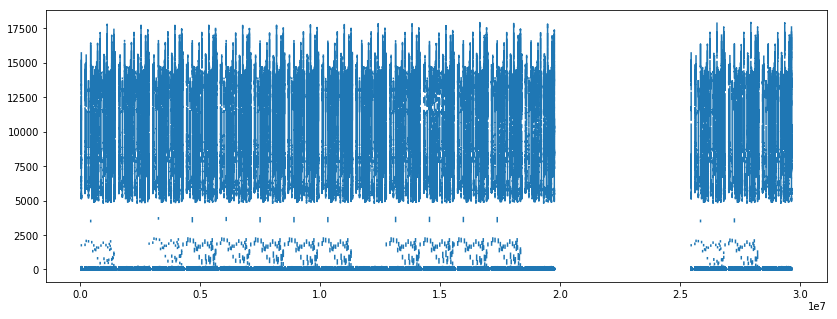

In [133]:
plt.figure(figsize=[14,5])
plt.plot(np.abs( (xx8099/flags_xx).flatten() ))

In [137]:
# wait, why are the autocorrelations showing such big differences?  those should change really smoothly ...

(31694,)

divide by zero encountered in true_divide


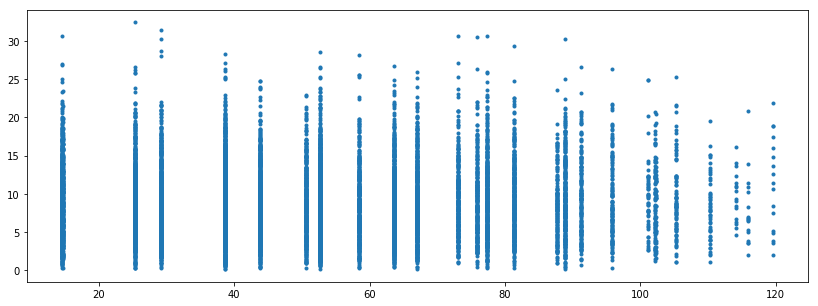

In [141]:
ch = 605
plt.figure(figsize=[14,5])
plt.plot(blm8098[blm8098 > 0], np.abs(((xx8098[:,ch]-xx8099[:,605])/flags_xx[:,600]).flatten() )[blm8098 > 0],'.')

In [94]:
uv8098.flag_array.shape

(31694, 1, 1024, 4)

divide by zero encountered in true_divide


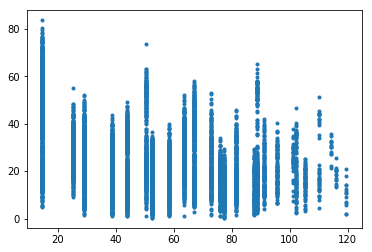

In [48]:
plt.plot(blm8098[blm8098 > 0], np.abs(uv8098.data_array[:,0,601,0]/~uv8098.flag_array[:,0,600,0])[blm8098 > 0],'.')

In [50]:
uv8098.write_uvfits?

In [ ]:
from scipy.stats import binned_statistic_2d

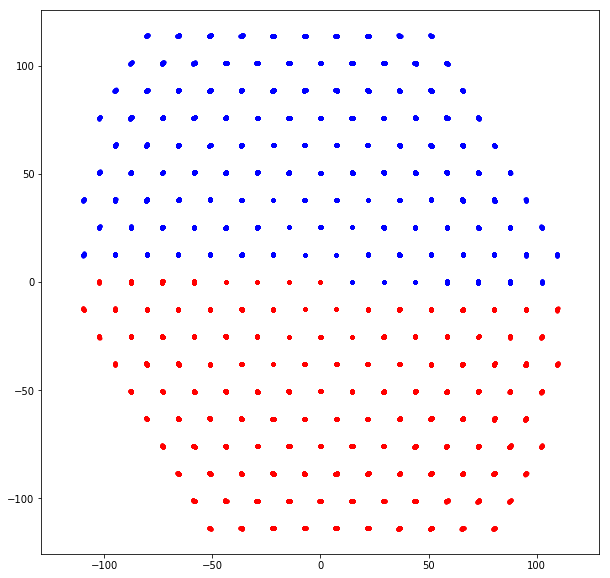

In [24]:
plt.figure(figsize=(10,10))
plt.plot(uv.uvw_array[:,0],uv.uvw_array[:,1],'b.')
#plt.plot(-uv.uvw_array[:,0],uv.uvw_array[:,1],'r.')
plt.plot(-uv.uvw_array[:,0],-uv.uvw_array[:,1],'r.')
plt.axis('equal')
plt.show()